In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [74]:
df = pd.read_csv("datasets/kmeans.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


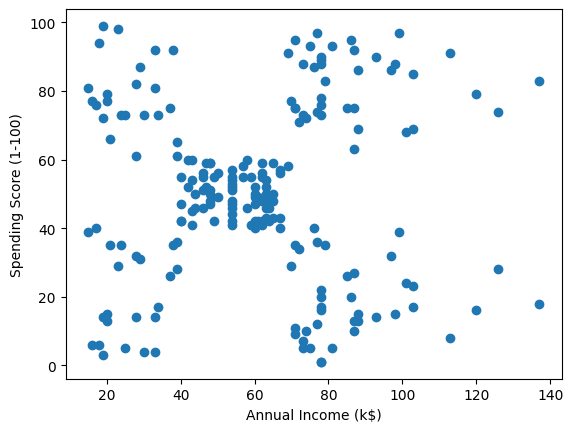

In [75]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [76]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [77]:
model = KMeans(n_clusters=5)  # Assume no. of clusters = 5
X['cluster'] = model.fit_predict(X)
X.tail()

/home/vignesh-pt6720/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_23539/3014100268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = model.fit_predict(X)


,Annual Income (k$),Spending Score (1-100),cluster
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3
199,137,83,1


In [78]:
X['cluster'].unique()

array([4, 2, 0, 1, 3], dtype=int32)

In [79]:
x0 = X[X['cluster'] == 0]
x1 = X[X['cluster'] == 1]
x2 = X[X['cluster'] == 2]
x3 = X[X['cluster'] == 3]
x4 = X[X['cluster'] == 4]
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

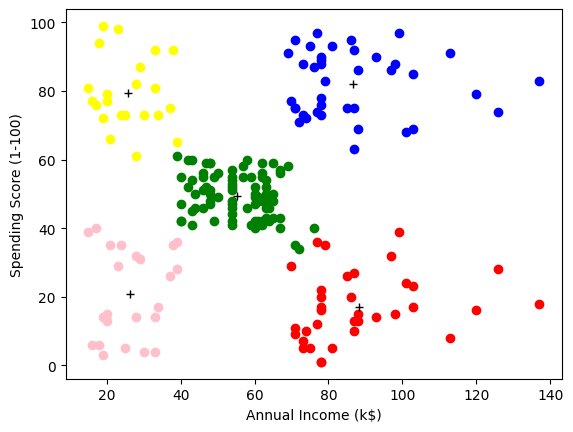

In [80]:
plt.scatter(x0['Annual Income (k$)'], x0['Spending Score (1-100)'], color='green')
plt.scatter(x1['Annual Income (k$)'], x1['Spending Score (1-100)'], color='blue')
plt.scatter(x2['Annual Income (k$)'], x2['Spending Score (1-100)'], color='yellow')
plt.scatter(x3['Annual Income (k$)'], x3['Spending Score (1-100)'], color='red')
plt.scatter(x4['Annual Income (k$)'], x4['Spending Score (1-100)'], color='pink')
for i in range(5):
    plt.plot(model.cluster_centers_[i][0], model.cluster_centers_[i][1], marker='+', color='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

/home/vignesh-pt6720/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/vignesh-pt6720/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/vignesh-pt6720/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/vignesh-pt6720/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


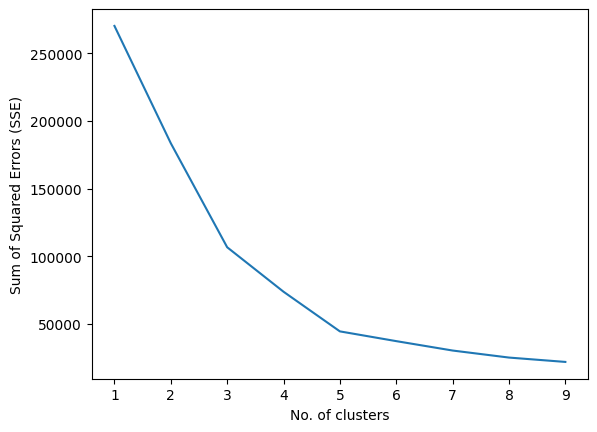

In [81]:
sse = []
k_range = range(1, 10)

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

plt.plot(k_range, sse)
plt.xlabel("No. of clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

# no. of clusters = 5 is taken as elbow point